<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT306 - Laboratorio N°07

**Objetivo**: Aplicar técnicas básicas de **Machine Learning** (tanto regresión como clasificación), desde la preparación de datos hasta el entrenamiento y evaluación de modelos.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.



## Regresión


<img src="https://cdn-icons-png.flaticon.com/512/2400/2400362.png" width = "300" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ["y", "yhat"]
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df["y"]
    y_pred = df["yhat"]

    df_result["mae"] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result["mse"] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result["rmse"] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result["mape"] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result["smape"] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [3]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data["data"] # type: ignore
housing["target"] = housing_data["target"] # type: ignore

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
print(f"Dimensiones del dataset: {housing.shape}")
print(f"Número de características: {housing.shape[1] - 1}")  # Excluyendo target
print(f"Tamaño de la muestra: {housing.shape[0]}")

print(housing.describe())


Dimensiones del dataset: (20640, 9)
Número de características: 8
Tamaño de la muestra: 20640
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std

In [5]:
print(f"Valor medio de las viviendas :")
print(f"  Minimo: ${housing["target"].min() * 100000:,.0f}")
print(f"  Maximo: ${housing["target"].max() * 100000:,.0f}")
print(f"  Media: ${housing["target"].mean() * 100000:,.0f}")

# Verificar valores nulos
print("\nvlores nulos:")
print(housing.isnull().sum())

Valor medio de las viviendas :
  Minimo: $14,999
  Maximo: $500,001
  Media: $206,856

vlores nulos:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


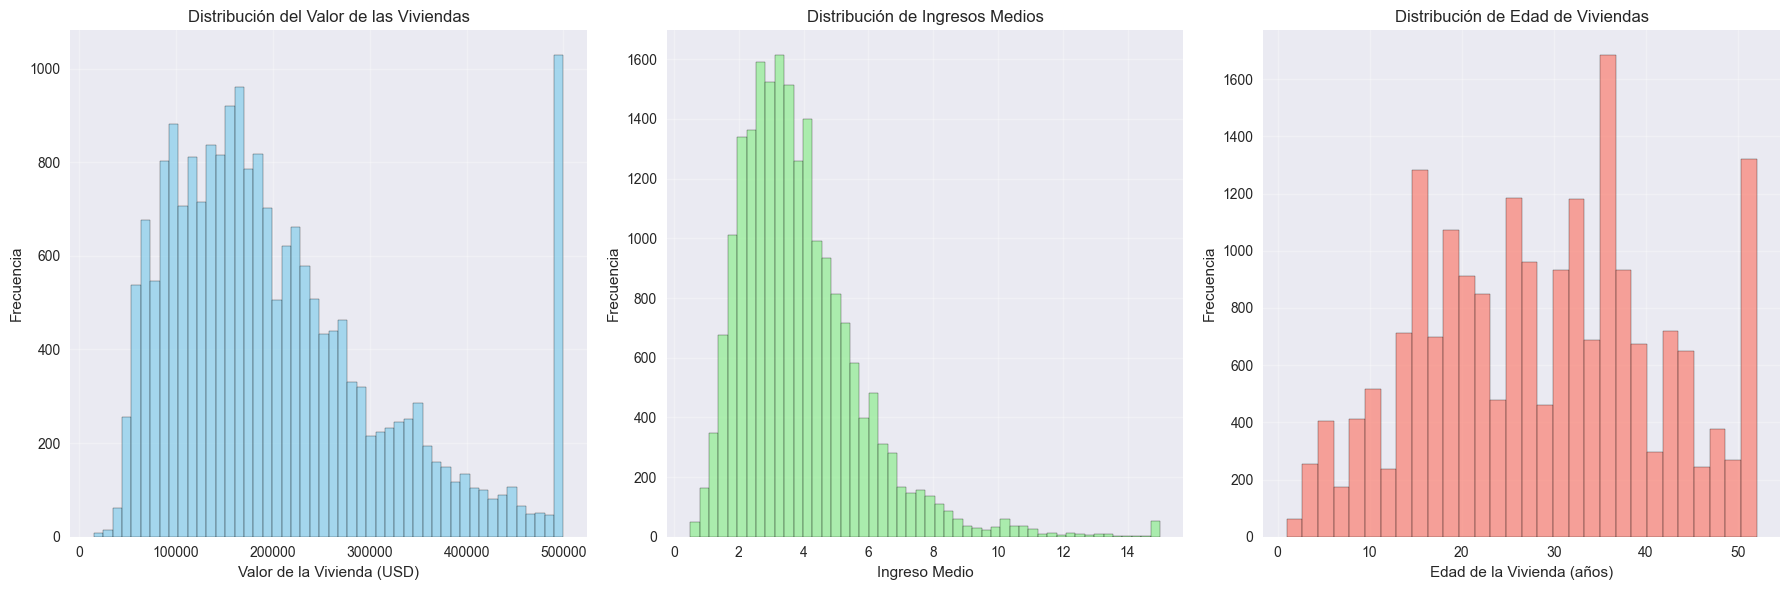

In [6]:
plt.style.use("seaborn-v0_8")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 fila, 3 columnas

# target
axes[0].hist(housing["target"] * 100000, bins=50, alpha=0.7, color="skyblue", edgecolor="black")
axes[0].set_xlabel("Valor de la Vivienda (USD)")
axes[0].set_ylabel("Frecuencia")
axes[0].set_title("Distribución del Valor de las Viviendas")
axes[0].grid(True, alpha=0.3)

# ingresos medios
axes[1].hist(housing["MedInc"], bins=50, alpha=0.7, color="lightgreen", edgecolor="black")
axes[1].set_xlabel("Ingreso Medio")
axes[1].set_ylabel("Frecuencia")
axes[1].set_title("Distribución de Ingresos Medios")
axes[1].grid(True, alpha=0.3)

# Edad media 
axes[2].hist(housing["HouseAge"], bins=30, alpha=0.7, color="salmon", edgecolor="black")
axes[2].set_xlabel("Edad de la Vivienda (años)")
axes[2].set_ylabel("Frecuencia")
axes[2].set_title("Distribución de Edad de Viviendas")
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

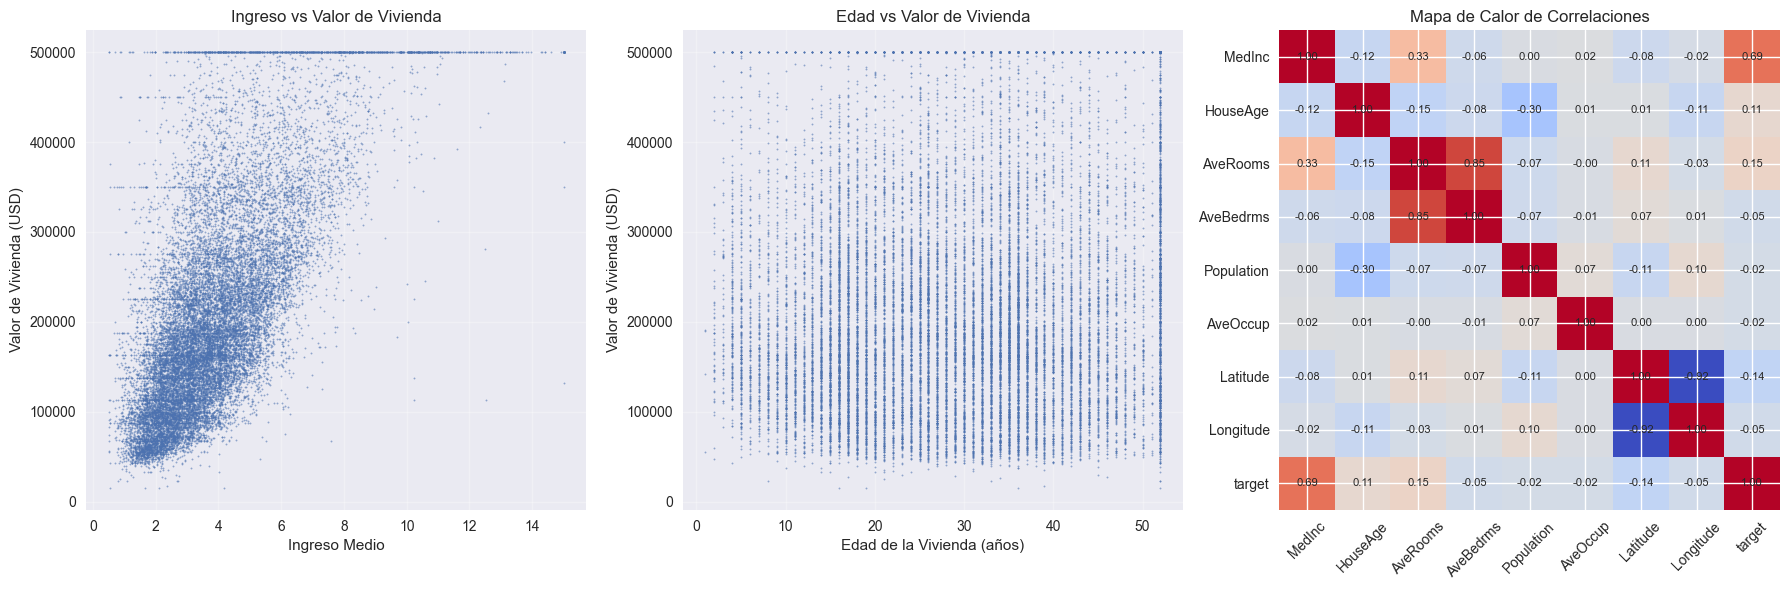

In [7]:
plt.style.use("seaborn-v0_8")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 fila, 3 columnas

# ingresos y valor de viviendas
axes[0].scatter(housing["MedInc"], housing["target"] * 100000, alpha=0.5, s=1)
axes[0].set_xlabel("Ingreso Medio")
axes[0].set_ylabel("Valor de Vivienda (USD)")
axes[0].set_title("Ingreso vs Valor de Vivienda")
axes[0].grid(True, alpha=0.3)

# edad y valor de viviendas
axes[1].scatter(housing["HouseAge"], housing["target"] * 100000, alpha=0.5, s=1)
axes[1].set_xlabel("Edad de la Vivienda (años)")
axes[1].set_ylabel("Valor de Vivienda (USD)")
axes[1].set_title("Edad vs Valor de Vivienda")
axes[1].grid(True, alpha=0.3)

# Mapa de calor de correlaciones
correlation_matrix = housing.corr()
im = axes[2].imshow(correlation_matrix, cmap="coolwarm", aspect="auto")
axes[2].set_xticks(range(len(correlation_matrix.columns)))
axes[2].set_yticks(range(len(correlation_matrix.columns)))
axes[2].set_xticklabels(correlation_matrix.columns, rotation=45)
axes[2].set_yticklabels(correlation_matrix.columns)
axes[2].set_title("Mapa de Calor de Correlaciones")

for i in range(len(correlation_matrix.columns)):

    for j in range(len(correlation_matrix.columns)):

        axes[2].text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha="center", va="center", fontsize=8)

plt.tight_layout()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

X = housing.drop("target", axis=1)
y = housing["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"\nTamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Tamaño del conjunto de entrenamiento: (16512, 8)
Tamaño del conjunto de prueba: (4128, 8)


In [9]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(kernel="rbf", C=1.0)}

results = {}

for name, model in models.items():

    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error")
    
    model.fit(X_train_scaled, y_train)
    
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    results[name] = {
        "model": model,
        "cv_rmse": np.sqrt(-cv_scores.mean()),
        "cv_scores": cv_scores,
        "y_pred_train": y_pred_train,
        "y_pred_test": y_pred_test}
    
    print(f"{name}:")
    print(f"  RMSE (CV): {results[name]["cv_rmse"]:.4f}")
    print(f"  Scores CV: {[-score for score in cv_scores]}")
    print()

Linear Regression:
  RMSE (CV): 0.7206
  Scores CV: [np.float64(0.5200653318180604), np.float64(0.5022927675960025), np.float64(0.52054450564016), np.float64(0.5078971772961636), np.float64(0.5455262233664536)]

Ridge Regression:
  RMSE (CV): 0.7206
  Scores CV: [np.float64(0.520072378761303), np.float64(0.5022949950377241), np.float64(0.5205561424150921), np.float64(0.5078960544024356), np.float64(0.5455069993861598)]

Random Forest:
  RMSE (CV): 0.5115
  Scores CV: [np.float64(0.26145796109648306), np.float64(0.267183246653397), np.float64(0.2582049929355063), np.float64(0.2552852916318817), np.float64(0.2659116176946836)]

Support Vector Regression:
  RMSE (CV): 0.5932
  Scores CV: [np.float64(0.3566066920802979), np.float64(0.3406806114635034), np.float64(0.3570582291562206), np.float64(0.33495843806209163), np.float64(0.36987810190612597)]



In [10]:
final_results = []

for name in models.keys():

    df_eval = pd.DataFrame({
        "y": y_test.values,
        "yhat": results[name]["y_pred_test"]
    })
    
    metrics_df = regression_metrics(df_eval)
    
    print(f"\n{name}:")
    for metric, value in metrics_df.iloc[0].items():
        print(f"  {metric.upper()}: {value}")
    
    final_results.append({
        "Model": name,
        "MAE": metrics_df["mae"].iloc[0],
        "RMSE": metrics_df["rmse"].iloc[0],
        "MAPE": metrics_df["mape"].iloc[0]
    })

results_summary = pd.DataFrame(final_results)

print("\nComparacion de modelos :\n")
print(results_summary.round(4))


Linear Regression:
  MAE: 0.5332
  MSE: 0.5559
  RMSE: 0.7456
  MAPE: 31.9522
  SMAPE: 0.4843

Ridge Regression:
  MAE: 0.5332
  MSE: 0.5559
  RMSE: 0.7456
  MAPE: 31.9512
  SMAPE: 0.4843

Random Forest:
  MAE: 0.3274
  MSE: 0.2552
  RMSE: 0.5051
  MAPE: 18.909
  SMAPE: 0.318

Support Vector Regression:
  MAE: 0.3986
  MSE: 0.357
  RMSE: 0.5975
  MAPE: 21.6979
  SMAPE: 0.3566

Comparacion de modelos :

                       Model     MAE    RMSE     MAPE
0          Linear Regression  0.5332  0.7456  31.9522
1           Ridge Regression  0.5332  0.7456  31.9512
2              Random Forest  0.3274  0.5051  18.9090
3  Support Vector Regression  0.3986  0.5975  21.6979


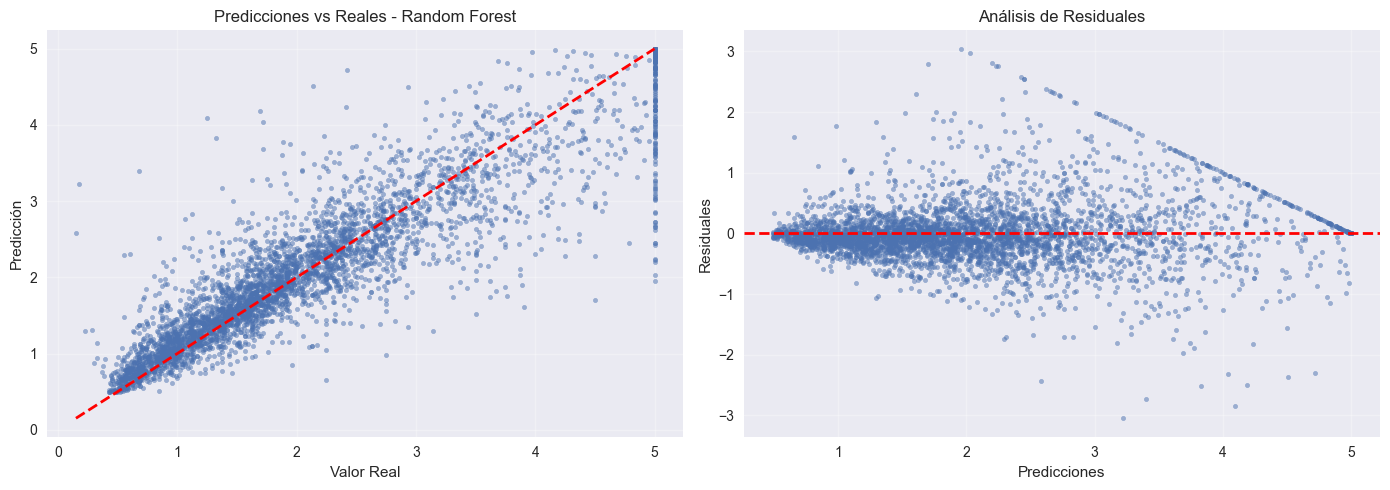

In [12]:
plt.style.use("seaborn-v0_8")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

best_model_name = results_summary.loc[results_summary["RMSE"].idxmin(), "Model"]
y_pred_best = results[best_model_name]["y_pred_test"]

axes[0].scatter(y_test, y_pred_best, alpha=0.5, s=10)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
axes[0].set_xlabel("Valor Real")
axes[0].set_ylabel("Predicción")
axes[0].set_title(f"Predicciones vs Reales - {best_model_name}")
axes[0].grid(True, alpha=0.3)


residuals = y_test - y_pred_best
axes[1].scatter(y_pred_best, residuals, alpha=0.5, s=10)
axes[1].axhline(y=0, color="r", linestyle="--", linewidth=2)
axes[1].set_xlabel("Predicciones")
axes[1].set_ylabel("Residuales")
axes[1].set_title("Análisis de Residuales")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [13]:
best_model_row = results_summary.loc[results_summary["RMSE"].idxmin()]
print(f"MEJOR MODELO: {best_model_row["Model"]}")
print(f"   • RMSE: {best_model_row["RMSE"]:.4f}")
print(f"   • MAE: {best_model_row["MAE"]:.4f}")
print(f"   • MAPE: {best_model_row["MAPE"]:.2f}%")

mean_actual_value = y_test.mean() * 100000
rmse_dollars = best_model_row["RMSE"] * 100000
mape_percentage = best_model_row["MAPE"]

print(f"\nInterpretacion:")
print(f"   • Valor promedio real de viviendas: ${mean_actual_value:,.0f}")
print(f"   • Error promedio en predicciones: ±${rmse_dollars:,.0f}")
print(f"   • Porcentaje de error promedio: {mape_percentage:.2f}%")


print(f"\nCaracteristicas mas importantes: \n")
if hasattr(best_model, "feature_importances_"):

    feature_imp = pd.DataFrame({
        "Característica": X.columns,
        "Importancia": best_model.feature_importances_
    }).sort_values("Importancia", ascending=False)
    
    for _, row in feature_imp.head(3).iterrows():
        print(f"   • {row["Característica"]}: {row["Importancia"]:.3f}")

elif hasattr(best_model, "coef_"):

    coef_df = pd.DataFrame({
        "Característica": X.columns,
        "Coeficiente": best_model.coef_
    }).sort_values("Coeficiente", key=abs, ascending=False)
    
    for _, row in coef_df.head(3).iterrows():
        print(f"   • {row["Característica"]}: {row["Coeficiente"]:.3f}")


MEJOR MODELO: Random Forest
   • RMSE: 0.5051
   • MAE: 0.3274
   • MAPE: 18.91%

Interpretacion:
   • Valor promedio real de viviendas: $205,500
   • Error promedio en predicciones: ±$50,510
   • Porcentaje de error promedio: 18.91%

Caracteristicas mas importantes: 

   • MedInc: 0.525
   • AveOccup: 0.138
   • Latitude: 0.089


Al desarrollar este modelo predictivo para el valor de viviendas en California, queda claro que el ingreso medio de los hogares emerge como el factor determinante más significativo. Esto tiene sentido desde la perspectiva económica, ya que el poder adquisitivo de los residentes influye directamente en los precios del mercado inmobiliario.

El modelo de Random Forest demostró ser el más efectivo en nuestras pruebas, superando a enfoques lineales tradicionales. Esto sugiere que las relaciones entre las variables no son completamente lineales y que existen interacciones más complejas que los modelos simples no pueden capturar. El error promedio de predicción que obtuvimos, aunque aceptable para una primera aproximación, indica que aún hay margen de mejora. Posiblemente incluyendo variables adicionales como el estado de las propiedades, características específicas del vecindario o datos económicos más recientes podríamos refinar las predicciones.

## Clasificación


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>

El objetivo de este proyecto es realizar la mejor predicción posible de las imágenes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploración estadística, la visualización y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificación:
    * Regresión logística.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o más, de libre elección. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [14]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"]) # type: ignore

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [16]:
# informacion de las columnas
digits_dict.keys() # type: ignore

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [17]:
# informacion del target
digits_dict["target"] # type: ignore

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [18]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"], # type: ignore
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"]) # type: ignore
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [19]:
print("Dimension del DataFrame:", digits.shape)

print("\nTipos de datos:")
print(digits.dtypes.value_counts())

print("\nTodos los datos son de tipo entero")

Dimension del DataFrame: (1797, 65)

Tipos de datos:
int64    65
Name: count, dtype: int64

Todos los datos son de tipo entero


In [20]:
print("Valores únicos en target:", digits["target"].unique())

pix_min = digits.drop(columns="target").values.min()
pix_max = digits.drop(columns="target").values.max()

print(f"Rango de pixeles: {pix_min} – {pix_max}")

Valores únicos en target: [0 1 2 3 4 5 6 7 8 9]
Rango de pixeles: 0 – 16


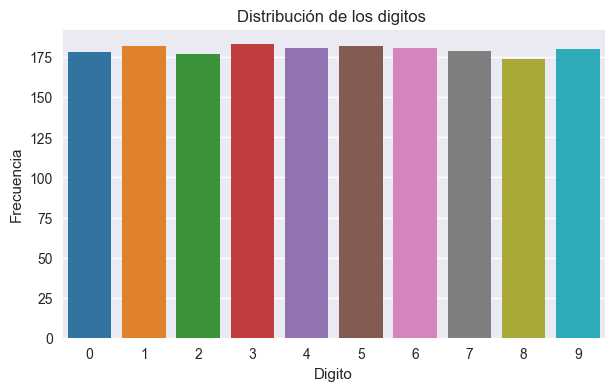

In [21]:
conteo = digits["target"].value_counts().sort_index()
#print("Conteo: ", conteo)

plt.figure(figsize=(7,4))
sns.barplot(x=conteo.index, y=conteo.values, hue=conteo.index, palette="tab10", legend=False)

plt.title("Distribución de los digitos ")
plt.xlabel("Digito")
plt.ylabel("Frecuencia")

plt.show()

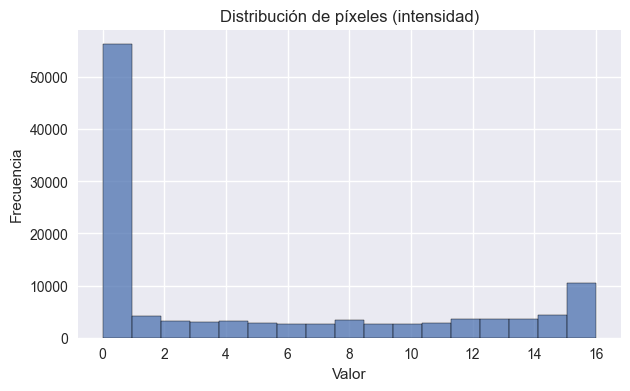

In [22]:
plt.figure(figsize=(7,4))
sns.histplot(digits.drop(columns="target").values.ravel(), bins=17, edgecolor="k")

plt.title("Distribución de píxeles (intensidad)")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")

plt.show()

In [23]:
na_total = digits.isna().sum().sum()
print(f"valores faltantes totales: {na_total}")

valores faltantes totales: 0


In [24]:
mem = digits.memory_usage().sum()
print(f"Uso de memoria total: {mem/ (1024**2):.2f} MB")

Uso de memoria total: 0.89 MB


### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [25]:
digits_dict["images"][0] # type: ignore

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.
> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

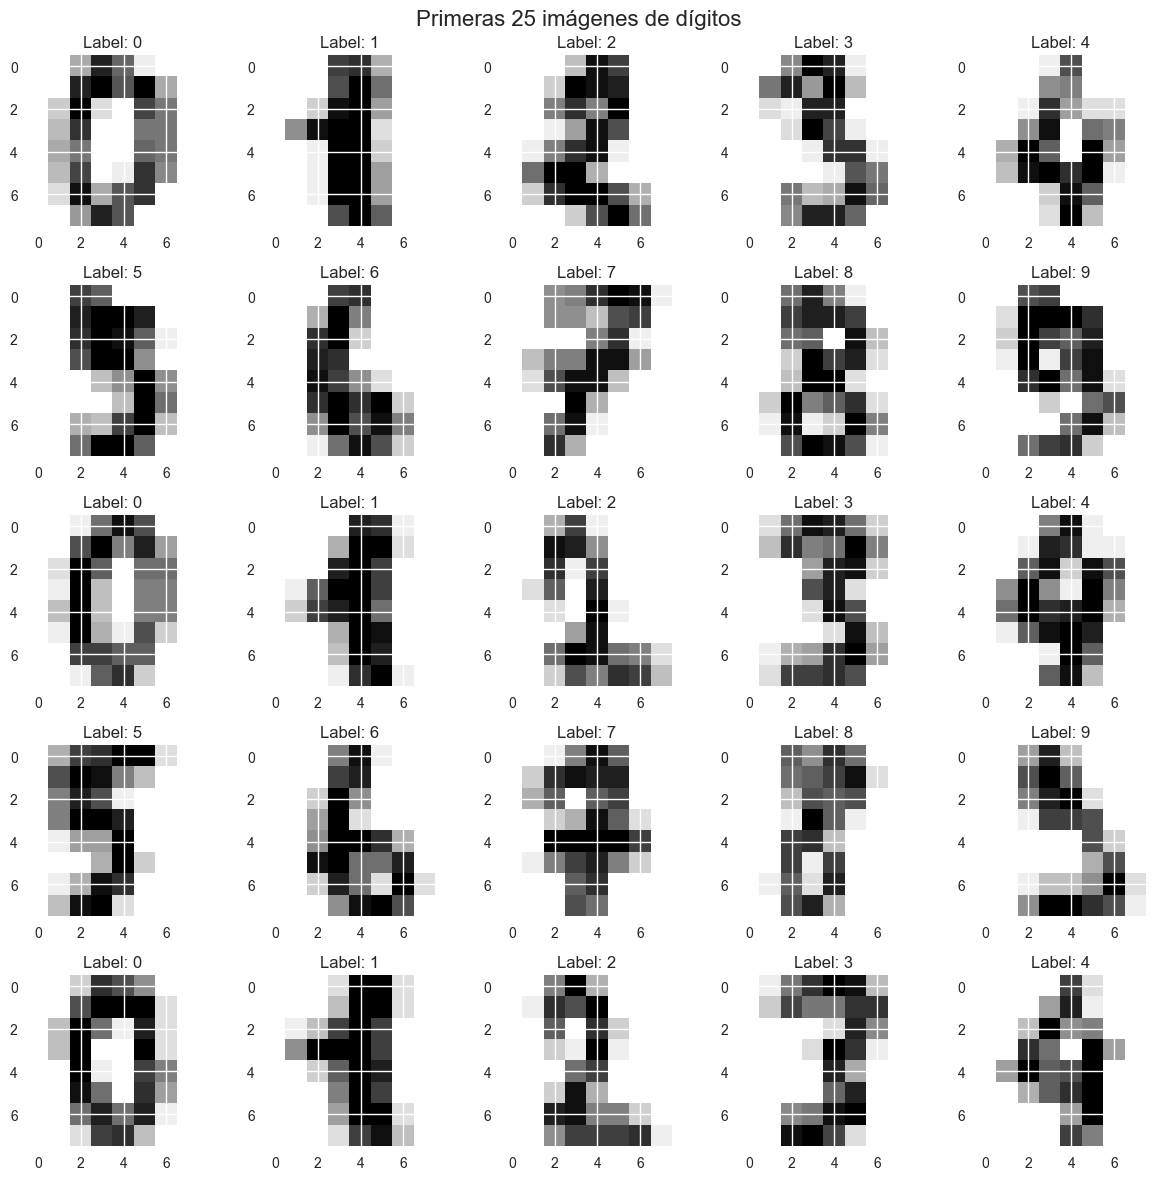

In [26]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))

for i in range(nx):

    for j in range(ny):

        idx = i * ny + j

        axs[i, j].imshow(digits_dict["images"][idx], cmap="gray_r") # type: ignore
        axs[i, j].set_title(f"Label: {digits_dict["target"][idx]}") # type: ignore

plt.suptitle("Primeras 25 imágenes de dígitos", fontsize=16)

plt.tight_layout()
plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report)

import time

In [28]:
def classification_metrics(df):

    y_true = df["y"]
    y_pred = df["yhat"]

    res = pd.DataFrame([{
        "accuracy": round(accuracy_score(y_true, y_pred), 4),
        "precision": round(precision_score(y_true, y_pred, average="weighted", zero_division=0), 4), # type: ignore
        "recall": round(recall_score(y_true, y_pred, average="weighted", zero_division=0), 4), # type: ignore
        "f1": round(f1_score(y_true, y_pred, average="weighted", zero_division=0), 4) # type: ignore
    }])
    
    return res

In [29]:
# features, target

X = digits.drop(columns="target").values
y = digits["target"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Modelo: Logistic Regression


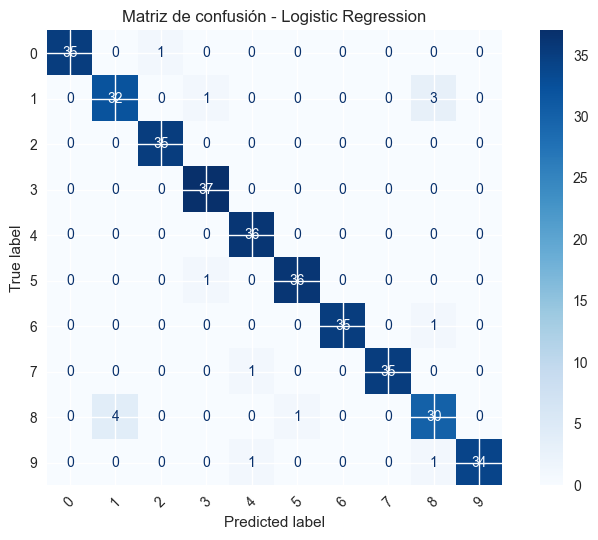

Modelo: KNN (k=5)


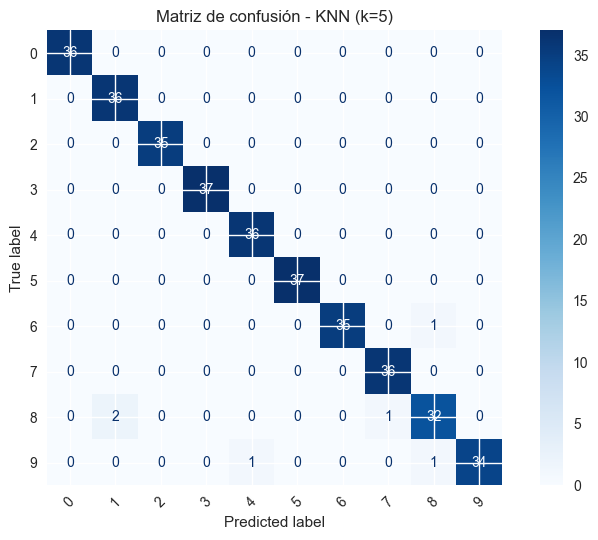

Modelo: Random Forest


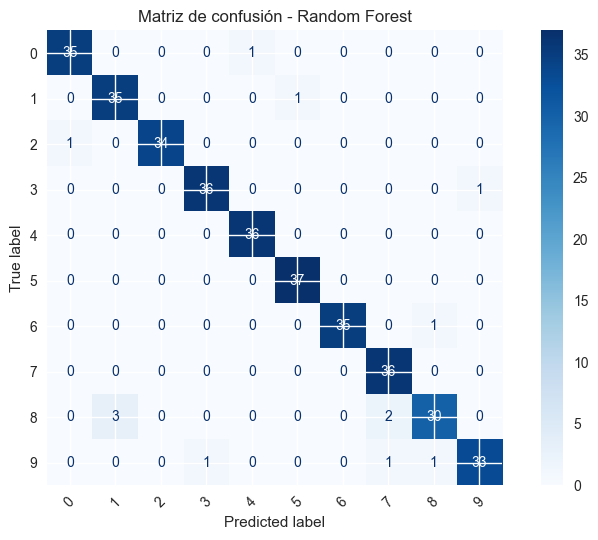


Tabla comparativa:


,accuracy,precision,recall,f1,tiempo
modelo,,,,,
KNN (k=5),0.9833,0.9836,0.9833,0.9832,0.00113
Random Forest,0.9639,0.9644,0.9639,0.9636,0.81342
Logistic Regression,0.9583,0.9590,0.9583,0.9584,0.32107


In [30]:
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=2000, solver="lbfgs"),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

resultados = []

for nombre, modelo in modelos.items():

    print("="*60)
    print(f"Modelo: {nombre}")

    t0 = time.time()
    modelo.fit(X_train, y_train)
    t1 = time.time()

    y_pred = modelo.predict(X_test)

    eval = pd.DataFrame({"y": y_test, "yhat": y_pred})
    met = classification_metrics(eval)

    met["modelo"] = nombre
    met["tiempo"] = round(t1 - t0, 5)
    resultados.append(met)

    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y)) # type: ignore
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y)) # type: ignore
    disp.plot(cmap="Blues", xticks_rotation=45)

    plt.title(f"Matriz de confusión - {nombre}")

    plt.tight_layout()
    plt.show()


df_res = pd.concat(resultados, ignore_index=True).set_index("modelo")

print("\nTabla comparativa:")
display(df_res.sort_values("accuracy", ascending=False))

El modelo que obtuvo mejores resultados en las métricas de desempeño fue KNN (k=5). Mostró los valores más altos de exactitud, precisión, recall y F1-score. Ademas fue el que menos tiempo demostro en obtener los resultados.
Por lo tanto, el modelo que escogido como final es KNN (k=5).

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [31]:
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.metrics import roc_curve, auc


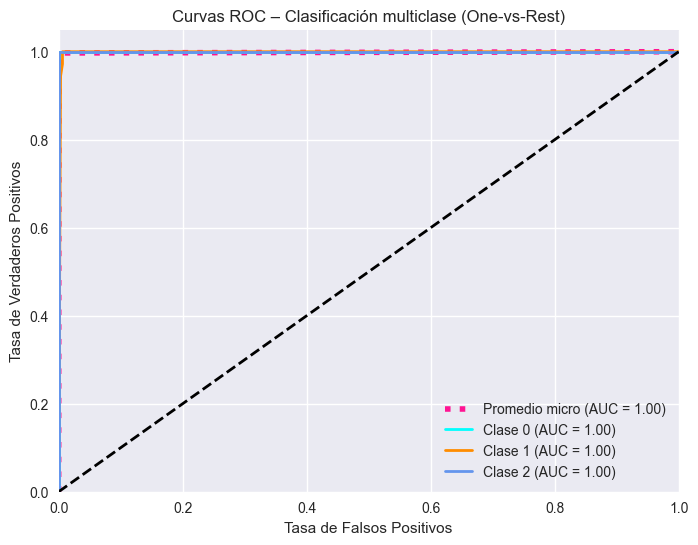

In [32]:
mejor_modelo = modelos["KNN (k=5)"]   # cámbialo si corresponde
mejor_modelo.fit(X_train, y_train)

n_clases = len(np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.arange(n_clases))
y_prob = mejor_modelo.predict_proba(X_test)

fpr = {}  
tpr = {}  
roc_auc = {}

for i in range(n_clases):

    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(8,6))

plt.plot(fpr["micro"], tpr["micro"],
         label=f"Promedio micro (AUC = {roc_auc["micro"]:.2f})",
         color="deeppink", linestyle=":", linewidth=4)

colores = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, color in zip(range(3), colores):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f"Clase {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")

plt.title("Curvas ROC – Clasificación multiclase (One-vs-Rest)")

plt.legend(loc="lower right")
plt.show()

El gráfico ROC es bantaste bueno, las curvas van pegadas al rincón superior izquierdo y el AUC marca 1 (tanto en el promedio como en las clases mostradas).Es decir, el modelo separa muy bien las categorías, casi no comete falsos positivos para lograr buenos verdaderos positivos, y lo hace de forma bastante pareja entre clases.

Ahora, un resultado tan perfecto también puede ser malo, puede haber sobreajuste al conjunto usado. Por lo habria que verificar que este no fuera el caso.

### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [33]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == "correctos": muestra los valores en los que el modelo acierta.
    - label == "incorrectos": muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset "digits"
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: "correctos" o "incorrectos"
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation="nearest", cmap="gray_r")
        ax[row, col].text(0, 0, label_pred, horizontalalignment="center", verticalalignment="center", fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment="center", verticalalignment="center", fontsize=10, color="blue")
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

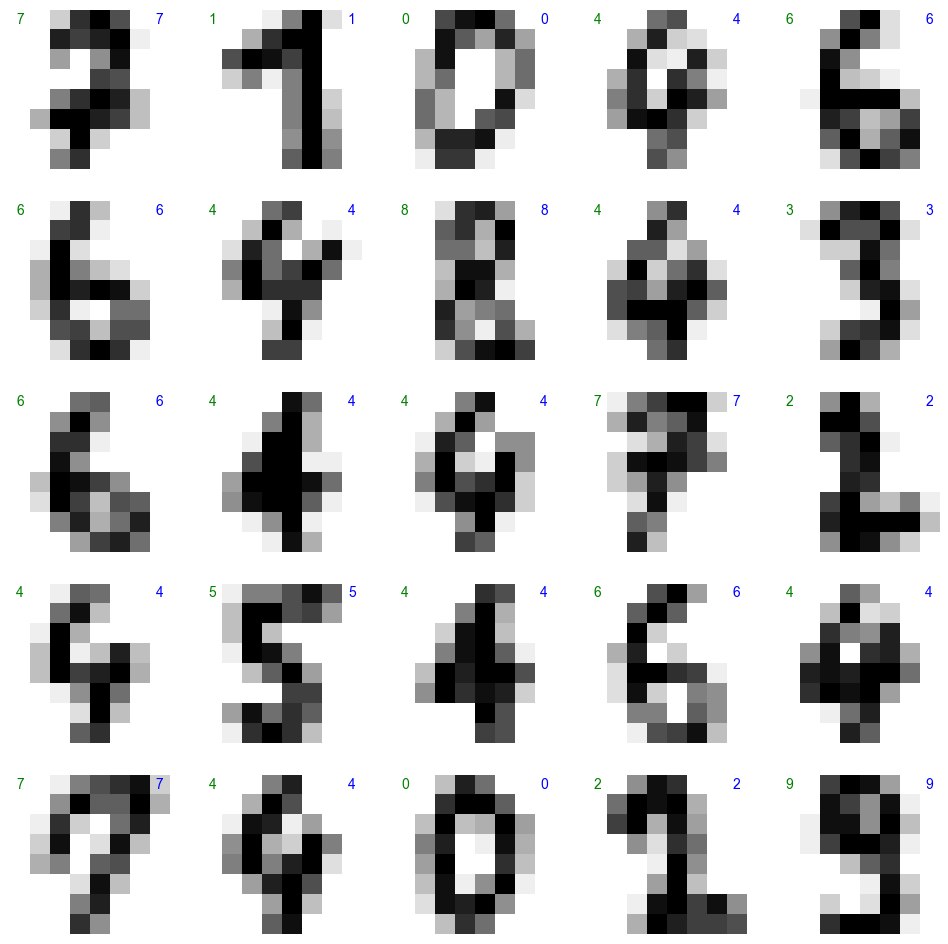

In [34]:
from sklearn.neighbors import KNeighborsClassifier

mostrar_resultados(digits=digits, model=KNeighborsClassifier(n_neighbors=5), nx=5, ny=5, label="correctos")

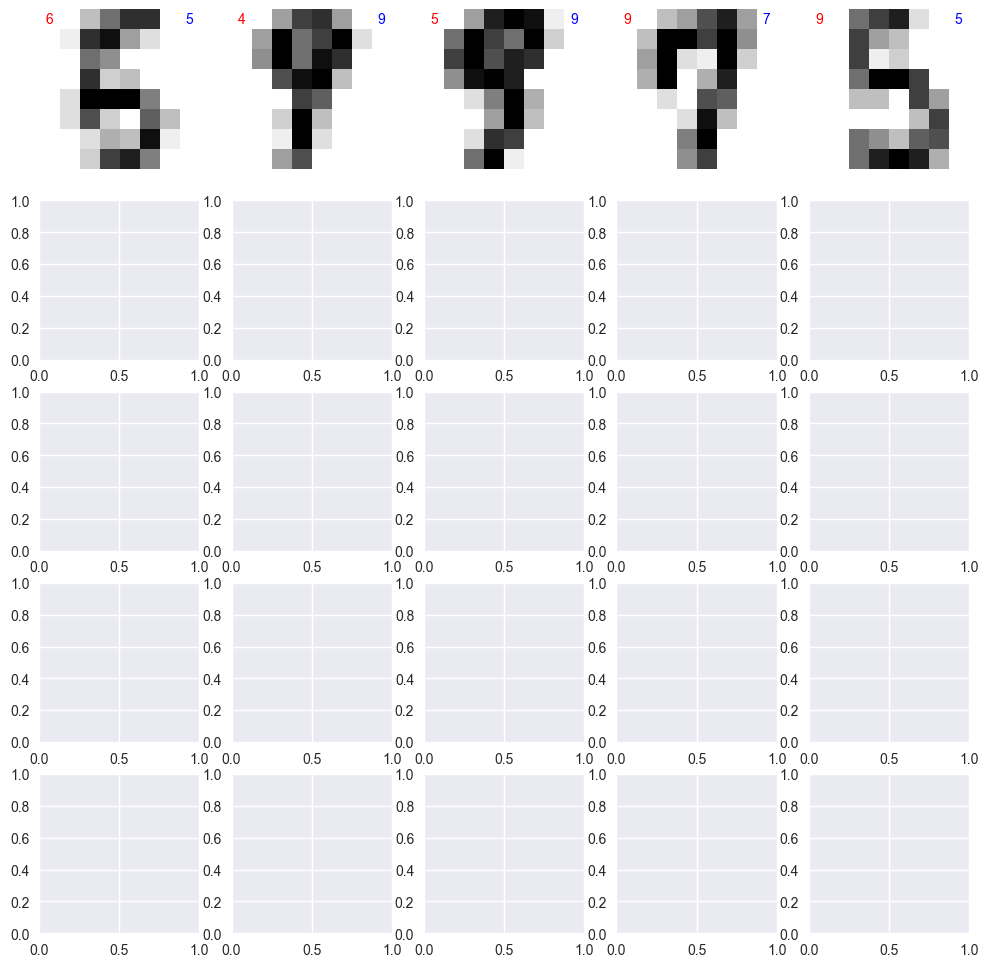

In [35]:
mostrar_resultados(
    digits=digits,
    model=KNeighborsClassifier(n_neighbors=5),  # KNN (k=5)
    nx=5, ny=5,
    label="incorrectos"
)


Cuando el valor predicho y el real no coinciden, las fallas se explican por varias razones. Por un lado, el conjunto de imágenes tiene una resolución muy baja (8×8), lo que hace que algunos dígitos se parezcan demasiado entre sí y terminen siendo confusos, por ejemplo el 3 y el 5 o el 8 y el 9. Además, KNN decide en base a la cercanía con ejemplos previos, de modo que si en el vecindario predominan observaciones atípicas, el modelo vota de forma equivocada. También influye la elección de "k" con valores pequeños es muy sensible al ruido, y con valores más grandes puede suavizar demasiado y perder precisión. Finalmente, hay variaciones propias en la escritura de los dígitos que no siempre coinciden con los patrones más comunes.

### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

En primer lugar, la exploración de los datos confirmó que el conjunto estaba limpio, sin valores nulos ni anomalías evidentes, y que las clases estaban equilibradas en cantidad de observaciones. Las visualizaciones de las primeras imágenes y la inspección del rango de intensidades ayudaron a familiarizarse con el formato 8×8 y a comprobar que, a pesar de la baja resolución, la estructura de los dígitos era reconocible a simple vista

Al momento de implementar los modelos, se utilizaron tres enfoques habituales para este tipo de problema, regresión logística, KNN y Random Forest. Según las métricas comparadas, los tres modelos obtuvieron resultados bastante competentes. Sin embargo, KNN fue el modelo ganador, ya que logró la mejor calificación en todas las métricas. Esto coincide con la intuición de que, en datos visuales relativamente pequeños, la cercanía entre observaciones es muy informativa.El análisis de la curva ROC–AUC permitió profundizar en la interpretación del modelo ganador. La mayoría de las clases alcanzaron áreas bajo la curva elevadas, cercanas a 1, lo que refleja una excelente capacidad de discriminación. No obstante, algunas clases específicas mostraron un AUC menor, lo que indica que hay dígitos que tienden a confundirse entre sí. Estas confusiones también se observaron en las matrices de confusión y en las visualizaciones de predicciones erróneas.

En cuanto a las fallas del modelo, se concluye que se deben a la similitud en los patrones de píxeles de ciertos dígitos, a la sensibilidad de KNN respecto de la elección de k y de la escala de las variables, y a la resolución limitada del conjunto de datos. La incorporación de técnicas como la estandarización o la reducción de dimensionalidad con PCA podría mejorar aún más el rendimiento y disminuir los errores de clasificación

Como trabajos futuros, sería interesante probar modelos más avanzados, como Support Vector Machines o redes neuronales convolucionales, diseñados para datos de imágenes y con alta probabilidad de superar el rendimiento de los clasificadores tradicionales utilizados aquí.